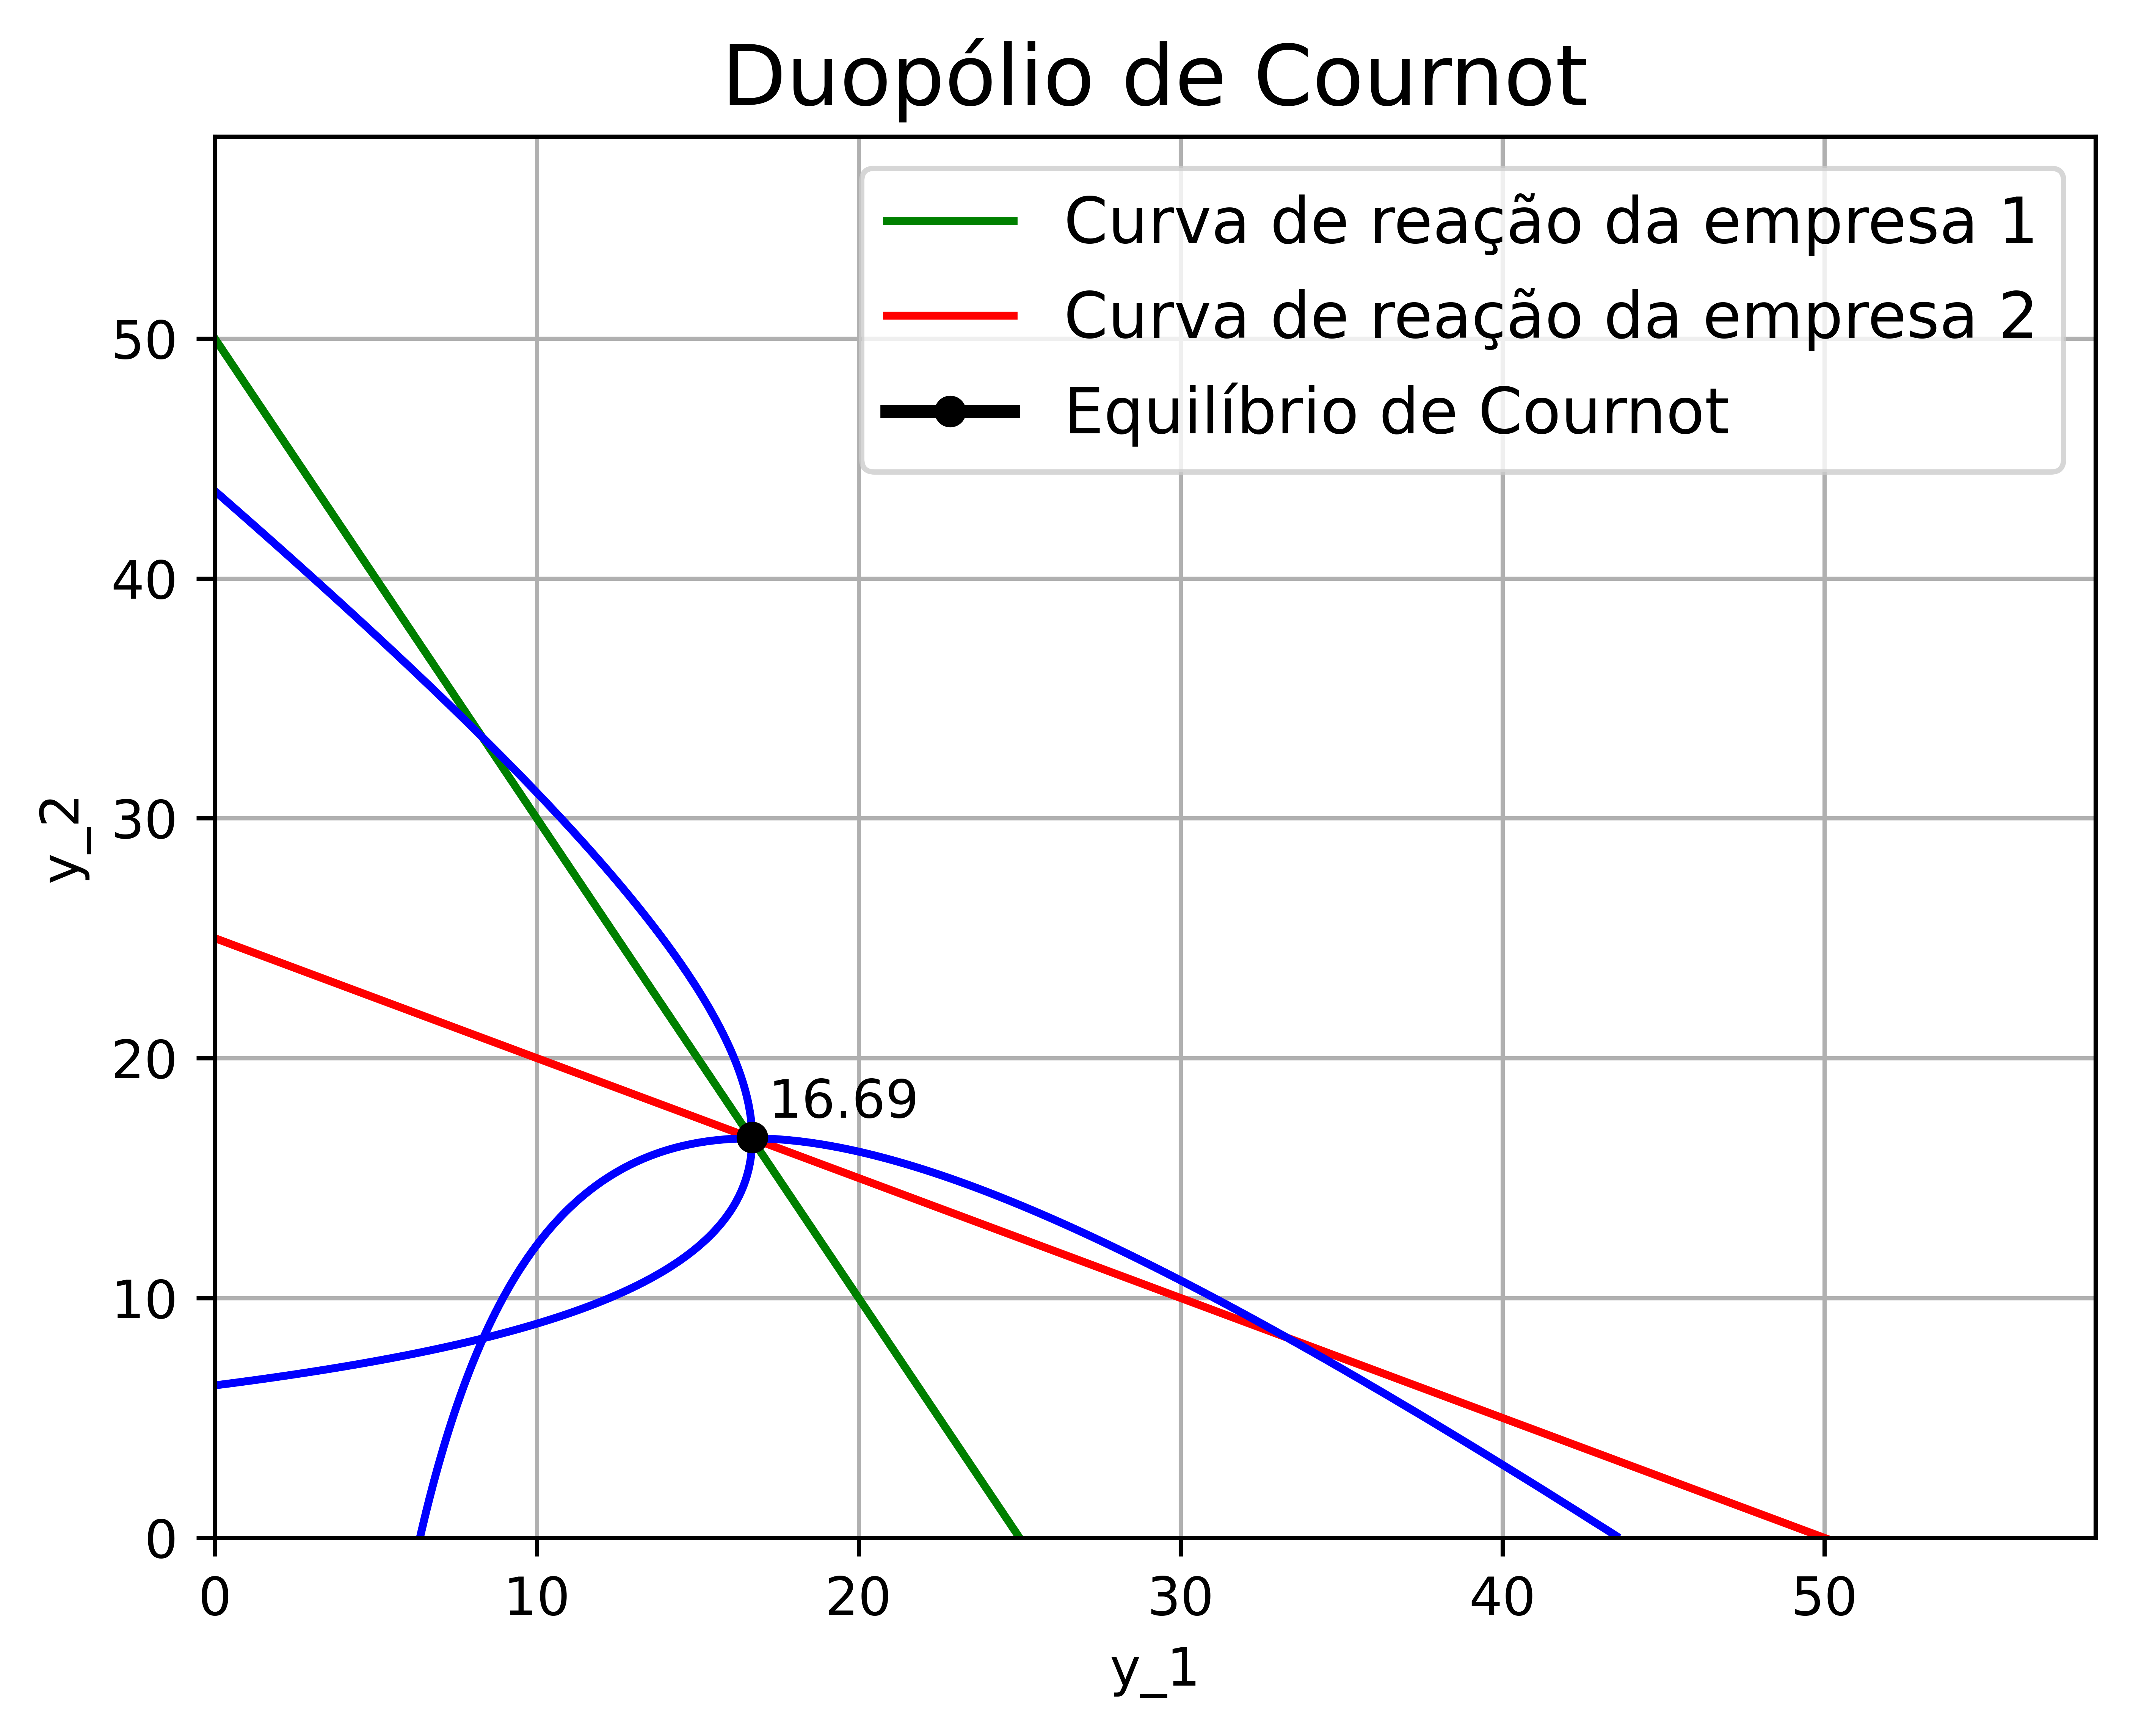

In [1]:
# Importa os módulos necessários
import matplotlib.pyplot as plt
import numpy as np

# Define os valores
a = 50 # Intercepto do eixo y
b = 1 # Inclinação

assert a > 0 and b!= 0

# Cria o grid
grid = np.linspace(0, a * 2, 1000)

# Cria as listas vazias
lista_y1 = []
lista_y2 = []
lista_aux_y2 = []

# Preenche as listas
def cournot():
    for g in grid:
        y_1 = (a - b * g) / (2 * b)
        y_2 = (a - b * y_1) / (2 * b)
        y_2_aux = (a - b * g) / (2 * b)
        
        lista_y1.append(y_1)
        lista_y2.append(y_2)
        lista_aux_y2.append(y_2_aux)

# Chama a função Cournot
cournot()

# Cria uma lista vazia para calcular a diferença entre a produção   
lista_excesso = []

# Preenche a lista de excesso
for r in range(len(lista_y1)):
    lista_excesso.append(abs(lista_y1[r] - lista_y2[r]))

# Calcula a posição de excesso mínimo e a produção de equilíbrio
posicao_minimo = np.argmin(lista_excesso)
Y_equilibrio = (a - b * grid[posicao_minimo]) / (2 * b)

# Calcula o preço e o lucro das empresas
preco = lambda q1, q2: a - b * (q1 + q2)
preco_eq = a - b * Y_equilibrio
lucro_emp1 = lambda q1, q2: preco(q1, q2) * q1
lucro_emp2 = lambda q1, q2: preco(q1, q2) * q2

# Cria um grid para cada empresa
grid_emp1 = np.linspace(0.000001, a / b, 1000)
grid_emp2 = np.linspace(0.000001, a / b, 1000)

# Cria um plano cartesiano usando os dois vetores
vetor1, vetor2 = np.meshgrid(grid_emp1, grid_emp2)

# Calcula os lucros de cada empresa
lucro1 = lucro_emp1(vetor1, vetor2)
lucro2 = lucro_emp2(vetor1, vetor2)

# Calcula o lucro máximo de cada empresa    
lucro1_max = lucro_emp1(lista_y1[posicao_minimo], lista_y2[posicao_minimo])
lucro2_max = lucro_emp2(lista_y1[posicao_minimo], lista_y2[posicao_minimo])

# Cria as curvas
fig, ax = plt.subplots(dpi = 1000) # Nitidez
ax.plot(lista_y1, grid, label = "Curva de reação da empresa 1",
        color = "green")
ax.plot(grid, lista_aux_y2, label = "Curva de reação da empresa 2",
        color = "red")
c1 = ax.contour(vetor1, vetor2, lucro1, levels = [lucro1_max], colors = "blue") # Plota a isolucro da empresa 1
c2 = ax.contour(vetor1, vetor2, lucro2, levels = [lucro2_max], colors = "blue") # Plota a isolucro da empresa 2

# Configura o tamanho da figura e espessura das linhas
plt.rcParams["figure.figsize"] = (9, 5)
plt.rcParams["lines.linewidth"] = (2.5)

# Cria o ponto de equilíbrio e coloca a legenda
ax.plot(Y_equilibrio, Y_equilibrio, markersize = 5,
        marker = "o", color = "black", label = "Equilíbrio de Cournot") # Interseção das curvas
ax.legend(fontsize = 12) # Box de legenda
ax.set_title("Duopólio de Cournot", fontsize = 16) # Título do gráfico
ax.annotate("%.2f" %(Y_equilibrio),
            (1.03 * Y_equilibrio, 1.05 * Y_equilibrio)) # Legenda o ponto de equilíbrio

# Define os intervalos e coloca a legenda nos eixos e no ponto
ax.set_xlim(0, Y_equilibrio * 3.5) # Intervalo do eixo x
ax.set_ylim(0, Y_equilibrio * 3.5) # Intervalo do eixo y
ax.set_xlabel("y_1") # Da nome ao eixo x
ax.set_ylabel("y_2") # Da nome ao eixo y

# Coloca grade e plota o gráfico
plt.grid(True) # Coloca grade no gráfico
plt.show() # Plota o gráfico